# K Nearest Neighbors (KNN)
## Objective

As a result of completing this exercise you should be able to:

- Understand the concept of Classification
- Understand the concept of KNN
- Explore different distance functions
- Load real-world data from `sklearn` datasets (built-in data)
- Use `sklearn` to implement a KNN classification
- Explore decision boundary using `matplotlib` and a predefined function

## Import Libraries or Define Functions Used for Later

### Import libraries used for the whole notebook (Optional)

We may import all the libraries we will use in the beginning or we may import individual library later in other cells just before using it

Once the library is imported (and the cell is run) it can be used since then

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric

import warnings
warnings.filterwarnings('ignore')

### Define a function to visualize the decision regions or decision bounaries 

In [2]:
# import necessary packages and methods
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## Decision Functions

### Define function to visualize the distance functions

In [3]:
#Create a desne grid of points on the unit scquare
xx, yy = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1,1,0.01))
xl = xx.flatten()
yl = yy.flatten()
xy = np.vstack((xl,yl)).T

def plot_distance_contours(dist):
    dl = dist.pairwise(xy,[[0,0]])
    dg = dl.reshape(xx.shape)
    plt.figure(1, figsize=(6, 5));
    CS=plt.contour(xx,yy,dg);
    plt.clabel(CS, inline=1, fontsize=10)
    plt.ylim((-1,1));
    plt.xlim((-1,1));
    plt.colorbar();
    plt.plot([0],[0],'ow');

### Euclidean Distance

The plot below shows the contours of $d(\mathbf{x}, 0)$, i.e, the distance of points in the plane from the origin, for the Euclidean distance function. (This is also the special case of Minkowski distance when $p=2$.)

Euclidean Distance ($\ell_2$ norm): $||x-y||_2 = \sqrt{\sum_{j=1}^n (x_j-y_j)^2}$

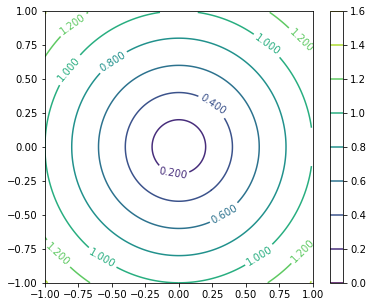

In [4]:
dist = DistanceMetric.get_metric('euclidean')
plot_distance_contours(dist)

### Manhattan distance
The plot below shows the contours of $d(\mathbf{x}, 0)$, i.e, the distance of points in the plane from the origin, for the Manhattan distance function. (This is also the special case of Minkowski distance when $p=1$.)

Manhattan Distance ($\ell_1$ norm): $||x-y||_1 = \sum_{d=1}^D |x_d-y_d|$

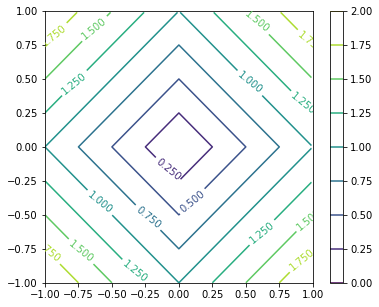

In [5]:
dist = DistanceMetric.get_metric('manhattan')
plot_distance_contours(dist)

### Chebyshev Distance

The plot below shows the contours of $d(\mathbf{x}, 0)$, i.e, the distance of points in the plane from the origin, for the Chebyshev Distance function. (This is also the special case of Minkowski distance when  $p \rightarrow \infty$.)

Use Chebyshev Distance ($\ell_{\infty}$ norm): $||x-y||_{\infty} = \max_d |x_d-y_d|$

In [ ]:
dist = DistanceMetric.get_metric('chebyshev')
plot_distance_contours(dist)

## Classification - Eamples

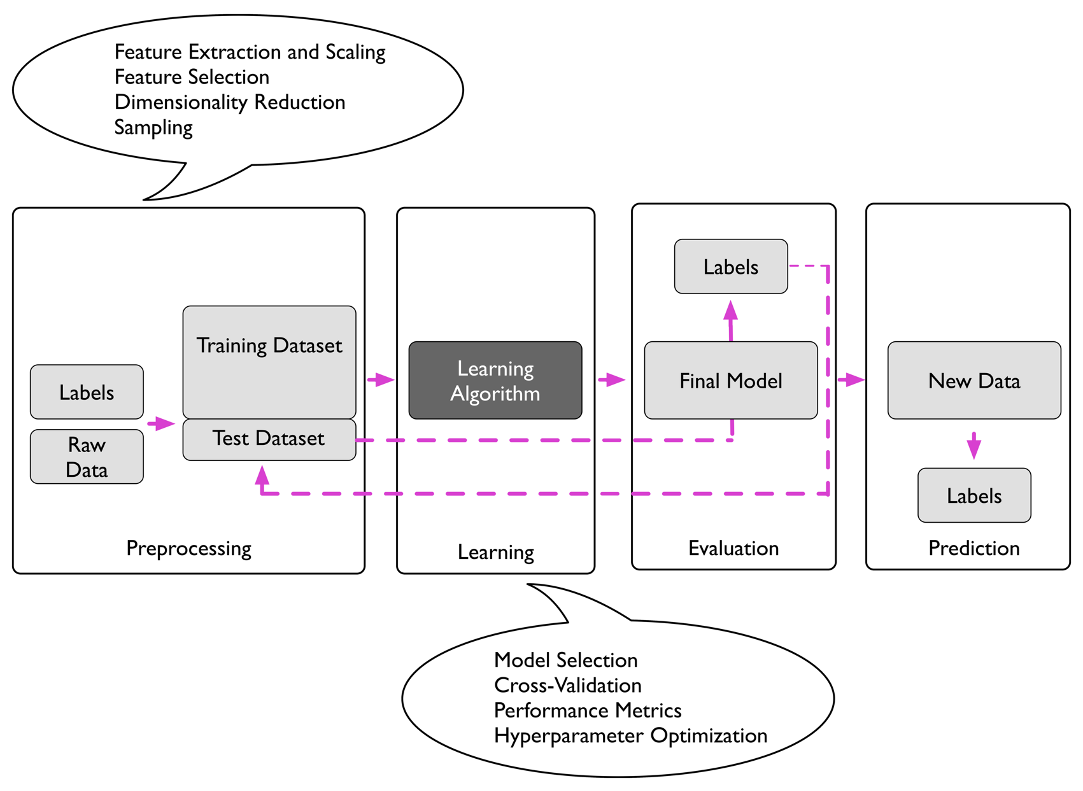

In [6]:
# display roadmap
from IPython.display import Image
Image(filename='roadmap.png', width=450)

### Eample with iris data - Basic

#### Preprocessing

##### Load data

In [7]:
# load necessary package and methods
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [8]:
# check the keys in builit-in data
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [9]:
# see the description of the data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
# check the features
print(iris.data.shape)
print(iris.data)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

Questions:\
How many samples (observations, instances) do you have? There are 150 samples.\ 
How many features does each sample have? Each sample has four features.

In [11]:
# check the label (target)
print(iris.target.shape)
print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Questions:\
How many does target or class label each sample have? 3\
How many values are there in the target vector? 150\

In [13]:
# assign the features and target values to variables
# use only two features for display the classification boundry on a 2D plot 
# which two features are used in this case?
X = iris.data[:, [2, 3]] #This is the third and fourth feature
y = iris.target

print('Feature dimension:', X.shape)
print('Class labels:', np.unique(y))

Feature dimension: (150, 2)
Class labels: [0 1 2]


In [14]:
# double check values in the variables
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

#### Learning - Training a Model

Fit or train a KNN classification model with training data using scikit-learn package

There are arguments or parameters we can assign our own value to in the function. If no value is assigned, that the function will use the default value for that argument/parameter and train the model with it.

We can fine tune our model by changing the value of the arguments or parameters

Check what the [arguments/parameters are avaialbe and how to customize them](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [15]:
# load necessary package and methods
from sklearn.neighbors import KNeighborsClassifier

# build a KNN model
# set the classifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
# fit the classifier from the training data
knn.fit(X, y)

KNeighborsClassifier()

#### Prediction - Using the model trained to make prediction

Predict the label or class for new x values (or new feature values)

In [16]:
# predict the sepcies of an Iris flower, which has petal lenght as 5cm and petal width as 2cm
knn.predict([[5, 2]])

array([2])

#### Plot the decision region or decision boundaries of KNN classification

This is not one of the steps in the Machine Learning Roadmap. The plot is to visual the classification outcome and for learning purpose.

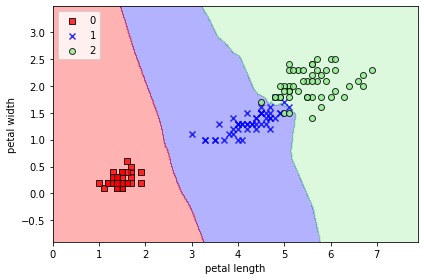

In [17]:
plot_decision_regions(X, y, 
                      classifier=knn)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Eample with iris data - Split Training data into Training and Testing sets

#### Preprocessing

##### Load data

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [ ]:
# check the features
print(iris.data.shape)
print(iris.data)

In [ ]:
# check the label (target)
print(iris.target.shape)
print(iris.target)

In [ ]:
# assign the features and target values to variables
# use only two features for display the classification boundry on a 2D plot 
X = iris.data[:, [2, 3]]
y = iris.target

print('Feature dimension:', X.shape)
print('Class labels:', np.unique(y))

In [ ]:
# double check values in the variables
# checking features and target of the first two instances
print(X[[1,2],:])
print(y[:2])

##### <span style="color:purple">Split training samples into training set and test set</span>

In [18]:
# load necessary package and methods
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [19]:
# show the numbers of observartions in each set (training example (all), training set, test set)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


#### Learning - Training a Model

Fit or train a KNN classification model with training data

In [20]:
# load necessary package and methods
from sklearn.neighbors import KNeighborsClassifier

# build a KNN model
# set the classifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
# fit the classifier from the training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Prediction - Using the model trained to make prediction

Predict the label or class for new x values (or new feature values)

In [21]:
# predict the sepcies of an Iris flower, which has petal lenght as 5cm and petal width as 2cm
knn.predict([[5, 2]])

array([2])

In [22]:
# features of the first iris flower in test set
X_test[0].reshape(-1,2)

array([[5.4, 2.3]])

In [23]:
# predict the sepcies of an Iris flower, which is the 5th instance in the test set
# show the features of the 5th flower
print(X_test[4])

# predict the target value (class label or speices) of the 5th flower use the features of that flower
knn.predict([X_test[4]])
# or
knn.predict(X_test[4].reshape(-1,2))

[4.4 1.4]


array([1])

In [24]:
# compare the prediction with the true target value
print("True label:", y_test[5], "predict label:", knn.predict([X_test[5]]))
print("True label:", y_test[5], "predict label:", knn.predict(X_test[5].reshape(-1,2)))

True label: 1 predict label: [1]
True label: 1 predict label: [1]


#### Plot the decision region or decision boundaries of KNN classification

This is not one of the steps in the Machine Learning Roadmap. The plot is to visual the classification outcome and for learning purpose.

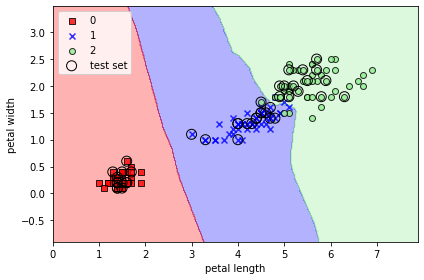

In [25]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Eample with iris data - Split Training data into Training and Testing sets and Standardize the Features

#### Preprocessing

##### Load data

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [ ]:
# check the features
print(iris.data.shape)
print(iris.data)

In [ ]:
# check the label (target)
print(iris.target.shape)
print(iris.target)

In [ ]:
# assign the features and target values to variables
# use only two features for display the classification boundry on a 2D plot 
X = iris.data[:, [2, 3]]
y = iris.target

print('Feature dimension:', X.shape)
print('Class labels:', np.unique(y))

In [ ]:
# double check values in the variables
# features and target of the first two instances
print(X[[1,2],:])
print(y[:2])

##### Split training samples into training set and test set

In [32]:
# load necessary package and methods
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [33]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [59 71 48]
Labels counts in y_train: [41 50 33]
Labels counts in y_test: [18 21 15]


#### <span style="color:purple"> Standardize features (Normalize features)</span>

In [ ]:
# load necessary package and methods
from sklearn.preprocessing import StandardScaler

# standardized the features in both the training and test set 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Learning - Training a Model

Fit or train a KNN classification model with training data

In [ ]:
# load necessary package and methods
from sklearn.neighbors import KNeighborsClassifier

# build a KNN model
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

#### Prediction - Using the model trained to make prediction

Predict the label or class for new x values (or new feature values)

In [ ]:
# predict the sepcies of an Iris flower, which has petal lenght as 5cm and petal width as 2cm
knn.predict([[5, 2]])

In [ ]:
# predict the sepcies of an Iris flower, which is the 5th instance in the test set
# show the features of the 5th flower
print(X_test[4])

# predict the target value (class label or speices) of the 5th flower use the features of that flower
knn.predict([X_test[4]])
# or
knn.predict(X_test[4].reshape(-1,2))

In [ ]:
# compare the predicted target value with the true target value
print("True label:", y_test[5], "predict label:", knn.predict([X_test[5]]))
print("True label:", y_test[5], "predict label:", knn.predict(X_test[5].reshape(-1,2)))

#### Plot the decision region or decision boundaries of KNN classification

This is not one of the steps in the Machine Learning Roadmap. The plot is to visual the classification outcome and for learning purpose.

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Note:\
Comparing the plots between standarized and unstandardized data, you will find that the standardize one has the same scale for both features (petal length and petal width); while the unstandardized has the original scale of each features.

### Eample with iris data - Using All the Features (and all the preprocessing tools)

#### Preprocessing

##### Load data

In [ ]:
# load necessary package and methods
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [ ]:
# check the features
print(iris.data.shape)
print(iris.data)

In [ ]:
# check the label (target)
print(iris.target.shape)
print(iris.target)

In [ ]:
# assign the features and target values to variables
X = iris.data
y = iris.target

print('Feature dimension:', X.shape)
print('Class labels:', np.unique(y))

In [ ]:
# double check values in the variables
# features and target of the first two instances
print(X[[1,2],:])
print(y[:2])

##### Split training samples into training set and test set

In [ ]:
# load necessary package and methods
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

#### Standardize features (Normalize features)

In [ ]:
# load necessary package and methods

from sklearn.preprocessing import StandardScaler

# standardized the features in both the training and test set 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Learning - Training a Model

Fit or train a KNN classification model with training data

In [ ]:
# load necessary package and methods
from sklearn.neighbors import KNeighborsClassifier

# build a KNN model
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

#### Prediction - Using the model trained to make prediction

Predict the label or class for new x values (or new feature values)

In [ ]:
# predict the sepcies of an Iris flower, which has petal lenght as 5cm and petal width as 2cm
knn.predict([[5, 2, 3, 1]])

In [ ]:
# predict the sepcies of an Iris flower, which is the 5th instance in the test set
# show the features of the 5th flower
print(X_test[5])

# predict the target value (class label or speices) of the 5th flower use the features of that flower
knn.predict([X_test[5]])
# or
knn.predict(X_test[5].reshape(-1,4))

In [ ]:
# compare the predicted target value with the true target value
print("True label:", y_test[5], "predict label:", knn.predict([X_test[5]]))
print("True label:", y_test[5], "predict label:", knn.predict(X_test[5].reshape(-1,4)))

Questions:\
Is using more features in a learning model always better? No, extra features can make the process take longer and the features may not be important to the identification process.\
How can you fine tune a KNN model? The KNN model can be made more efficient by standardizing features. You can also modify the amount of neighbors and distance function. Models shoudl be compared to determine if it is a better model. 

No plot is created for decision region and decision boundry for this example, because we have 4 features (petal length, petal width, sepal length, sepal width) and thus a 4D plot is needed.

Acknolwedgement: Examples are adapted from textbook Hands-OnMachine Learning with Scikit Learn, Keras, and TensorFlow 2nd edition, textbook Python Machine Learning 3rd edition, and demo in UMASS CS335.

## Exercises

Let build **KNN** classification with **anothe built-in dataset "wine"**

### Preprocessing

#### Load data

In [26]:
from sklearn import datasets
wine = datasets.load_wine()
list(wine.keys())

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [27]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [28]:
# check the data
print(wine.data)
print(wine.data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)


Questions:\
How many samples (observations, instances) do you have? There are 178 samples.\
How many features does each sample have? Each sample has 13 features.

In [29]:
# check the label
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Questions:\
How many does target or class label each sample have? 3\
How many values are there in the target vector? 178

In [37]:
# assign the features and target values to variables
X = wine.data
y = wine.target

print('Feature dimension:', X.shape)
print('Class labels:', np.unique(y))

Feature dimension: (178, 13)
Class labels: [0 1 2]


#### Split training samples into training set and test set

In [38]:
# load necessary package and methods
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [39]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [59 71 48]
Labels counts in y_train: [41 50 33]
Labels counts in y_test: [18 21 15]


#### Standardize

In [40]:
# load necessary package and methods
from sklearn.preprocessing import StandardScaler

# standardized the features in both the training and test set 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Learning - Training a Model

In [41]:
# build your KNN model
# load necessary package and methods
from sklearn.neighbors import KNeighborsClassifier

# set the classifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

# fit the classifier from training set
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

#### Prediction - Using the model trained to make prediction

Predict the label or class of a wine with these feature values as 12, 2, 1.6, 15, 80, 1.51, 2.17, 0.39, 1.3, 2.4, 1.11, 3.31, 650

In [ ]:
# predict the class of the wine with 13 features as 12, 2, 1.6, 15, 80, 1.51, 2.17, 0.39, 1.3, 2.4, 1.11, 3.31, 650

Predict the label or class of the 10th wine in the test set. Then compare your prediction with the true label or class from the vector of the target values for the test set.

In [ ]:
# predict the class of the wine, which is the 10th instance in the test set
# show the features of the 10th wine in the test set


# predict the target value (class label or speices) of the 10th wine in the test set use the features of that wine


In [ ]:
# compare the true class with the predicted class of the 10th wine in the test set

If you want to fine tune the model, what can you do?